#1. Data Preparation

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/balatmak/newsgroup20bbcnews')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aakkashsuresh
Your Kaggle Key: ··········


100%|██████████| 15.1M/15.1M [00:01<00:00, 13.3MB/s]


In [4]:
import pandas as pd
df = pd.read_csv('/content/newsgroup20bbcnews/bbc-text.csv')

In [5]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [9]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

There are 5 labels in the category feature whose count is approximately same

<Axes: xlabel='category', ylabel='count'>

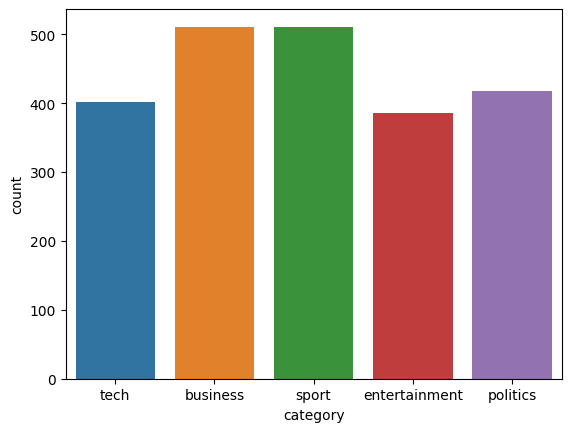

In [13]:
import seaborn as sns
sns.countplot(x='category',data=df)

# 2. Data Preprocessing

In [14]:
# Let's remove stopwords
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [18]:
text = df['text']
category = df['category']

In [19]:
import re

In [20]:
corpus = []
for i in range(len(text)):
    x = text[i]
    temp = re.sub('[^a-zA-Z0-9]',' ',x)  # Removing Unnecessary words
    temp = temp.lower()  # Converting them to lowercase
    temp = temp.split()  # Splitting the words

    # Appending words not found in stopwords
    temp = [ps.stem(word) for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    corpus.append(temp)

In [21]:
text[3]

'yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton me

In [22]:
len(text)

2225

In [24]:
length = 0
for i in text:
  length = max(len(i),length)
length

25483

Lets make use of the word2vec model from google

In [25]:
len(corpus)

2225

In [26]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[=================================================-] 99.7% 1658.6/1662.8MB downloaded


In [28]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
words = []
for sent in corpus:
  sent_token = sent_tokenize(sent) ## Tokenization
  for sent in sent_token:
    words.append(simple_preprocess(sent)) ## Lowering the words

In [107]:
model = gensim.models.Word2Vec(words,window=5,min_count=2)
w2v_model = model

In [39]:
sent_tokenize(corpus[0])

['tv futur hand viewer home theatr system plasma high definit tv digit video record move live room way peopl watch tv radic differ five year time accord expert panel gather annual consum electron show la vega discuss new technolog impact one favourit pastim us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devic one talk technolog ce digit person video record dvr pvr set top box like us tivo uk sky system allow peopl record store play paus forward wind tv programm want essenti technolog allow much personalis tv also built high definit tv set big busi japan us slower take europ lack high definit program peopl forward wind advert also forget abid network channel schedul put togeth la cart entertain us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channel although us lead technolog moment also concern rais europ particularli grow uptak servic like sky happen 

In [74]:
# Now lets conver the output category into numeric by encoding them
y = pd.get_dummies(df['category'],columns=df["category"]).values
y

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [75]:
# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(corpus,y,test_size=0.3,random_state=24)

In [76]:
train_words = []
for sent in x_train:
  sent_token = sent_tokenize(sent) ## Tokenization
  for sent in sent_token:
    train_words.append(simple_preprocess(sent)) ## Lowering the words

In [77]:
model = gensim.models.Word2Vec(train_words,window=5,min_count=2)

In [78]:
model.wv.index_to_key

['said',
 'year',
 'mr',
 'would',
 'also',
 'peopl',
 'us',
 'new',
 'one',
 'game',
 'time',
 'say',
 'use',
 'could',
 'last',
 'make',
 'first',
 'go',
 'like',
 'film',
 'two',
 'govern',
 'play',
 'take',
 'uk',
 'get',
 'world',
 'compani',
 'work',
 'back',
 'show',
 'best',
 'win',
 'music',
 'firm',
 'want',
 'market',
 'bn',
 'servic',
 'number',
 'month',
 'includ',
 'set',
 'mani',
 'come',
 'told',
 'way',
 'ad',
 'report',
 'plan',
 'made',
 'need',
 'countri',
 'labour',
 'home',
 'three',
 'look',
 'parti',
 'expect',
 'elect',
 'week',
 'day',
 'well',
 'call',
 'next',
 'sale',
 'bbc',
 'player',
 'think',
 'good',
 'million',
 'minist',
 'technolog',
 'second',
 'nation',
 'award',
 'may',
 'record',
 'mobil',
 'see',
 'right',
 'help',
 'top',
 'start',
 'share',
 'part',
 'still',
 'much',
 'open',
 'tv',
 'end',
 'move',
 'public',
 'group',
 'tax',
 'gener',
 'england',
 'sinc',
 'price',
 'offer',
 'blair',
 'high',
 'bank',
 'claim',
 'phone',
 'increas',
 'ev

In [79]:
model.corpus_count

1557

In [80]:
model.wv.similar_by_word('criticis')

[('dismiss', 0.9981951713562012),
 ('oliv', 0.9979391098022461),
 ('refus', 0.9975625872612),
 ('lawyer', 0.9973889589309692),
 ('down', 0.9968777298927307),
 ('welcom', 0.996767520904541),
 ('jewish', 0.9967378973960876),
 ('mayor', 0.9965867400169373),
 ('inquiri', 0.9965667724609375),
 ('stanc', 0.9965561628341675)]

In [81]:
# Define the tokenizer
from keras.preprocessing.text import Tokenizer
maxlen = 3000
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True)
tokenizer.fit_on_texts(x_train)

In [82]:
word_index = tokenizer.word_index

In [83]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [84]:
x_train_sequences[0]

[360,
 347,
 30,
 12,
 3042,
 487,
 104,
 524,
 347,
 30,
 2052,
 360,
 314,
 74,
 233,
 3173,
 696,
 180,
 360,
 347,
 203,
 100,
 272,
 58,
 398,
 723,
 879,
 63,
 2177,
 262,
 89,
 625,
 262,
 89,
 591,
 3,
 104,
 1,
 367,
 12,
 22,
 375,
 42,
 20,
 398,
 8865,
 559,
 360,
 1817,
 2013,
 864,
 5330,
 447,
 95,
 511,
 984,
 2302,
 347,
 879,
 11430,
 11431,
 11432,
 1029,
 233,
 696,
 3,
 104,
 660,
 8866,
 869,
 936,
 4921,
 11433,
 819,
 1931,
 11434,
 347,
 2420,
 11435,
 389,
 160,
 1,
 255,
 496,
 30,
 360,
 347,
 255,
 478,
 236,
 426,
 609,
 2,
 452,
 90,
 262,
 434,
 625,
 304,
 703,
 1030,
 46,
 70,
 128,
 530,
 58,
 399,
 53,
 8867,
 4592,
 1848,
 281,
 618,
 8865,
 1667,
 1269,
 2239,
 360,
 126,
 2303,
 879,
 4022,
 360,
 353,
 48,
 22,
 554,
 1115,
 298,
 2013,
 26,
 530,
 20,
 398,
 106,
 846,
 1377,
 625,
 63,
 3043,
 129,
 2751,
 22,
 133,
 4,
 147,
 2304,
 2119,
 584,
 2177,
 204,
 696,
 45,
 8,
 3173,
 281,
 3173,
 95,
 5,
 111,
 40,
 2239,
 347,
 2420,
 4922,
 2053

In [85]:
len(x_train_sequences[0]),len(x_train_sequences[1])

(237, 260)

In [86]:
# Since the number representation of the text are not the same, we need to pad them in order to make them same
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train_sequences, maxlen=3000,padding='pre')
x_test = pad_sequences(x_test_sequences,maxlen=3000,padding='pre')

#3. Model

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping

In [89]:
model=Sequential()
model.add(Embedding(50000,100,input_length=3000))  # Input as the number of words (vocabulary size)
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  #Softmax for multiclass
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3000, 100)         5000000   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
history = model.fit(x_train,y_train, epochs=7, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
22/22 [==============================] - 317s 14s/step - loss: 1.5802 - accuracy: 0.3084 - val_loss: 1.5823 - val_accuracy: 0.2179
Epoch 2/7
22/22 [==============================] - 302s 14s/step - loss: 1.2209 - accuracy: 0.5161 - val_loss: 1.0286 - val_accuracy: 0.5128
Epoch 3/7
22/22 [==============================] - 310s 14s/step - loss: 0.9215 - accuracy: 0.5225 - val_loss: 0.7855 - val_accuracy: 0.7051
Epoch 4/7
22/22 [==============================] - 308s 14s/step - loss: 0.7052 - accuracy: 0.7545 - val_loss: 0.7293 - val_accuracy: 0.8269
Epoch 5/7
22/22 [==============================] - 305s 14s/step - loss: 0.6665 - accuracy: 0.8037 - val_loss: 0.9447 - val_accuracy: 0.6410
Epoch 6/7
22/22 [==============================] - 303s 14s/step - loss: 0.3989 - accuracy: 0.8608 - val_loss: 0.4290 - val_accuracy: 0.8462
Epoch 7/7
22/22 [==============================] - 378s 17s/step - loss: 0.1972 - accuracy: 0.9657 - val_loss: 0.4850 - val_accuracy: 0.8397


In [94]:
accuracy = model.evaluate(x_test,y_test)
print(accuracy[0],accuracy[1])

21/21 [==============================] - 19s 885ms/step - loss: 0.3879 - accuracy: 0.8698
0.3879154622554779 0.8697604537010193


In [96]:
import matplotlib.pyplot as plt

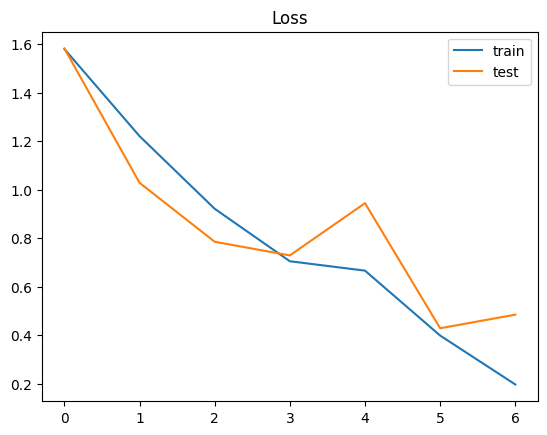

In [97]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

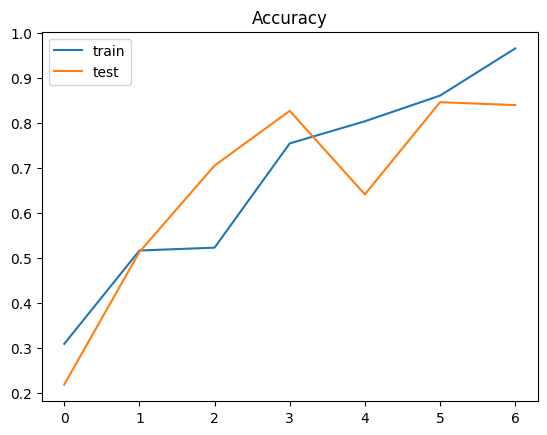

In [98]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();